In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

def smooth_tensorboard(values, smooth_factor=0.6):
    smoothed_values = np.zeros_like(values)
    num_runs, num_points = values.shape
    
    for i in range(num_runs):
        last_value = values[i, 0]  # Initialize with the first value for each run
        smoothed_values[i, 0] = last_value
        for j in range(1, num_points):
            smoothed_value = last_value * smooth_factor + (1 - smooth_factor) * values[i, j]
            smoothed_values[i, j] = smoothed_value
            last_value = smoothed_value
    
    return smoothed_values

def sliding_window_smooth(values, window_size=5):
    num_runs, num_points = values.shape
    new_num_points = num_points // window_size  # Number of windows per run
    smoothed_values = np.zeros((num_runs, new_num_points))

    for i in range(num_runs):
        for j in range(new_num_points):
            # Compute the average of each non-overlapping window
            start_idx = j * window_size
            end_idx = start_idx + window_size
            smoothed_values[i, j] = np.mean(values[i, start_idx:end_idx])
    
    return smoothed_values

data/a2c_bs Phoenix (3, 100) 11890.264347285383
logs/a2c_ucb_ent Phoenix (3, 100) 7240.776844982367
logs/a2c_ucb_lr Phoenix (3, 100) 12126.16181834609
logs/a2c_ucb_vfc Phoenix (3, 100) 11140.601098433066
logs/a2c_ucb_vfc_ent Phoenix (3, 100) 5335.645588062879
logs/a2c_ucb_lr_vfc Phoenix (3, 100) 10303.754711904125
logs/a2c_ucb_lr_ent Phoenix (3, 100) 5111.2557975282025
logs/a2c_ucb_lr_vfc_ent Phoenix (3, 100) 4989.44634676431
data/a2c_bs Qbert (3, 100) 8034.533165023368
logs/a2c_ucb_ent Qbert (3, 100) 5828.462599981221
logs/a2c_ucb_lr Qbert (3, 100) 9093.25676300183
logs/a2c_ucb_vfc Qbert (3, 100) 8814.603550247208
logs/a2c_ucb_vfc_ent Qbert (3, 100) 6280.039633981348
logs/a2c_ucb_lr_vfc Qbert (3, 100) 9807.146864548318
logs/a2c_ucb_lr_ent Qbert (3, 100) 6614.969380524858
logs/a2c_ucb_lr_vfc_ent Qbert (3, 100) 7105.382498998949


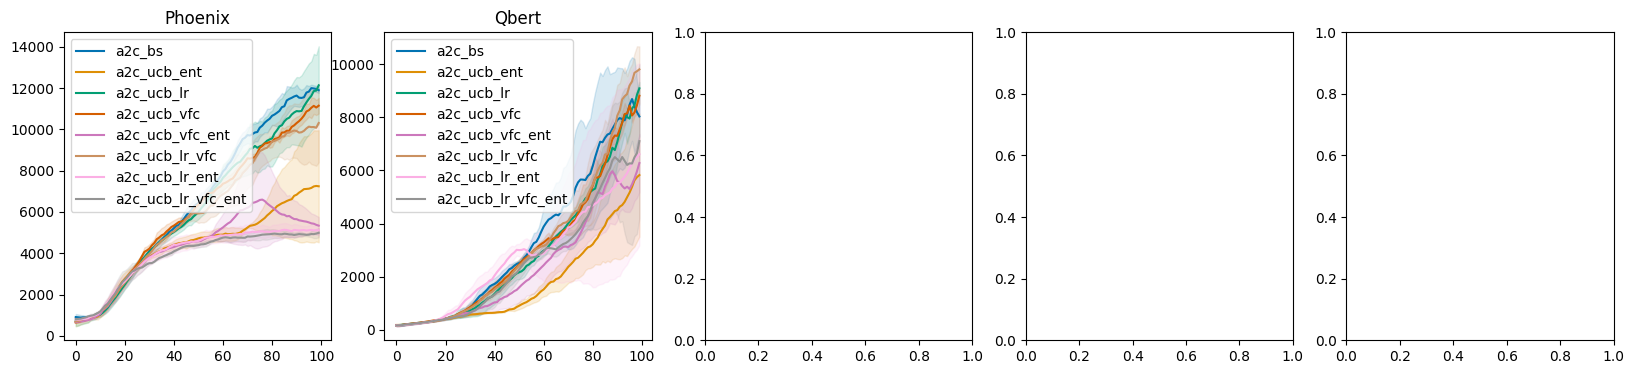

In [10]:
envs = [
    # 'BattleZone', 
    # 'DoubleDunk', 'NameThisGame', 
    'Phoenix', 'Qbert'
    ]

fig, axes = plt.subplots(1, 5, figsize=(20, 4))

colors = sns.color_palette("colorblind")
algos = [
'data/a2c_bs',
'logs/a2c_ucb_ent',
'logs/a2c_ucb_lr',
'logs/a2c_ucb_vfc',
'logs/a2c_ucb_vfc_ent',
'logs/a2c_ucb_lr_vfc',
'logs/a2c_ucb_lr_ent',
'logs/a2c_ucb_lr_vfc_ent'
     ]

for idx, env in enumerate(envs):
    ax = axes.flatten()[idx]
    for j, algo in enumerate(algos):
        root = f'{algo}'
        all_returns = []
        
        for dir in os.listdir(root):
            if env in dir and '.npz' not in dir:
                sub_returns = []
                for k in range(len(os.listdir(os.path.join(root, dir)))):
                    if k>15:
                        continue
                    df = pd.read_csv(os.path.join(root, f'{dir}/{k}.monitor.csv'), skiprows=1, sep=',')['r'].to_numpy()
                    sub_returns.append(df[np.linspace(0, len(df) - 1, 100).astype(int)])
                sub_returns = np.stack(sub_returns)
                all_returns.append(sub_returns.mean(axis=0))
        
        all_returns = np.stack(all_returns)
        all_returns = smooth_tensorboard(all_returns, 0.9)
        # all_returns = sliding_window_smooth(all_returns, 10)
        mean = all_returns.mean(axis=0)
        std = all_returns.std(axis=0)
        print(algo, env, all_returns.shape, mean[-1])

        ax.plot(np.arange(mean.shape[0]), mean, color=colors[j], label=algo.split('/')[-1])
        ax.fill_between(np.arange(mean.shape[0]), mean+std, mean-std, alpha=0.15, color=colors[j])
        

    ax.set_title(envs[idx])
    ax.legend()